In [3]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

In [4]:
# loading our data set
df = pd.read_csv('bank-additional-full.csv', sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Define a research question

Our research goal is to predict if the client will subscribe a bank term deposit (variable y).

# Cleanup the dataset 
The dataset contains small number of missing values. Since the missing values are not large, it is better to utilize these missing values. Additionally, it's necessary to drop columns that does not affect our research questions.

In [6]:
for column in df.columns:
    missing = len(df[df[column] == 'unknown'])
    print(f'{column} missing == {missing}')

age missing == 0
job missing == 330
marital missing == 80
education missing == 1731
default missing == 8597
housing missing == 990
loan missing == 990
contact missing == 0
month missing == 0
day_of_week missing == 0
duration missing == 0
campaign missing == 0
pdays missing == 0
previous missing == 0
poutcome missing == 0
emp.var.rate missing == 0
cons.price.idx missing == 0
cons.conf.idx missing == 0
euribor3m missing == 0
nr.employed missing == 0
y missing == 0


In [7]:
df = df.drop(['duration', 'contact', 'nr.employed'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  y               41188 non-null 

In [8]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

In [9]:
df['day_of_week'] = df['day_of_week'].replace({'mon': 1, 'tue': 2, 'wed' : 3, 'thu' : 4, 'fri' : 5})

In [10]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [11]:
df['month'] = df['month'].replace({'mar': 3, 'apr': 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9 , 'oct' : 10, 'nov' : 11, 'dec' : 12})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   month           41188 non-null  int64  
 8   day_of_week     41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  y               41188 non-null 

# Prepare the data for machine learning
Machine learning algorithms need numerical data. The best data transformation tool at our disposal is the pandas `get_dummies` method.

In [13]:
df_encoded = pd.get_dummies(df, columns=['poutcome','loan', 'housing', 'default', 'education', 'marital', 'job'])
df_encoded

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,0,0,0,0
1,57,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
2,37,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
3,40,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,0,0,0,0
4,56,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,1,0,0,0,0,0,0
41184,46,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,0,0,0,0,0,0,0
41185,56,11,5,2,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,1,0,0,0,0,0,0
41186,44,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  int64  
 2   day_of_week                    41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  poutcome_failure               41188 non-null  uint8  
 12  poutcome_nonexistent           41188 non-null 

In [15]:
columns = [c for c in df_encoded.columns if c != 'y']
columns

['age',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'default_no',
 'default_unknown',
 'default_yes',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown']

In [16]:
X = df_encoded.loc[:,columns]
X

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,0,0,0,0
1,57,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
2,37,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
3,40,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,0,0,0,0
4,56,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,1,0,0,0,0,0,0
41184,46,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,0,0,0,0,0,0,0
41185,56,11,5,2,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,1,0,0,0,0,0,0
41186,44,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,0,0,0,0,1,0,0


In [17]:
y = df_encoded['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

# KNN Analysis

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# What is your optimal K?
The optimal K is 18.

In [19]:
scores = []
print(f'Features: {X} \nTarget: {y}')

for k in range(2, 20):
    print(f'Evaluating {k} clusters')
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

Features:        age  month  day_of_week  campaign  pdays  previous  emp.var.rate  \
0       56      5            1         1    999         0           1.1   
1       57      5            1         1    999         0           1.1   
2       37      5            1         1    999         0           1.1   
3       40      5            1         1    999         0           1.1   
4       56      5            1         1    999         0           1.1   
...    ...    ...          ...       ...    ...       ...           ...   
41183   73     11            5         1    999         0          -1.1   
41184   46     11            5         1    999         0          -1.1   
41185   56     11            5         2    999         0          -1.1   
41186   44     11            5         1    999         0          -1.1   
41187   74     11            5         3    999         1          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  ...  job_entrepreneur  \
0              


Max accuracy = 89.45132313668365%


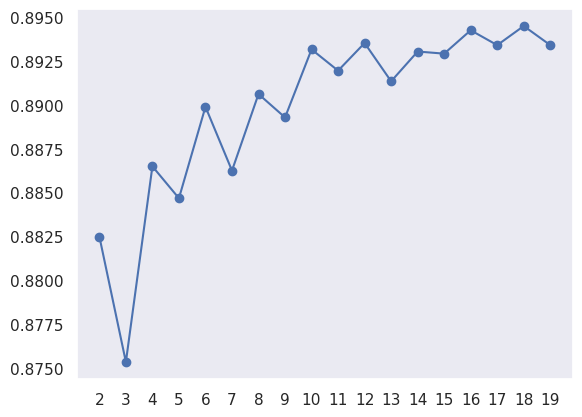

In [20]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))
print(f'\nMax accuracy = {(max(scores)*100)}%')

# Evaluate the accuracy of your model
The accuracy of our model is 89%.

In [21]:
model = KNeighborsClassifier(n_neighbors=18, n_jobs=-1)
model.fit(x_train, y_train)

preds = model.predict(x_test)

print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: y, Length: 8238, dtype: int64
Predictions for test data set
[0 0 0 ... 0 0 0]


In [22]:
print(model.score(x_test, y_test))

0.8945132313668366


# Discuss ways to improve the performance of your KNN model
We can improve our model either through `GridSearchCV` or scaling our data. `GridSearchCV` hypertunes the parameters of our model. Since we already found the optimal hyperparameter k for our model, we'll try the new method which is scaling our data.

# Implement one of those methods to improve your KNN model performance.

The accuracy of our second model is worse than our first model, and the reason is probably because scaling by mean and variance isn't a good strategy for term frequencies.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

seed = 42
num_folds = 5
scoring = 'accuracy'

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledKNN: 0.888983 (0.002526)


# Conclusion/Summary

Our improved model performed worse than the initial model by 1%. Therefore, we chose the initial model to answer our research question. The initial model correctly predicted 7369 out of randomly selected 8238 bank customer data. Below is graph showing this conclusion.

In [81]:
compare = pd.DataFrame({
    'value': y_test == preds
})
true = compare[compare['value'] == True]
false = compare[compare['value'] == False]

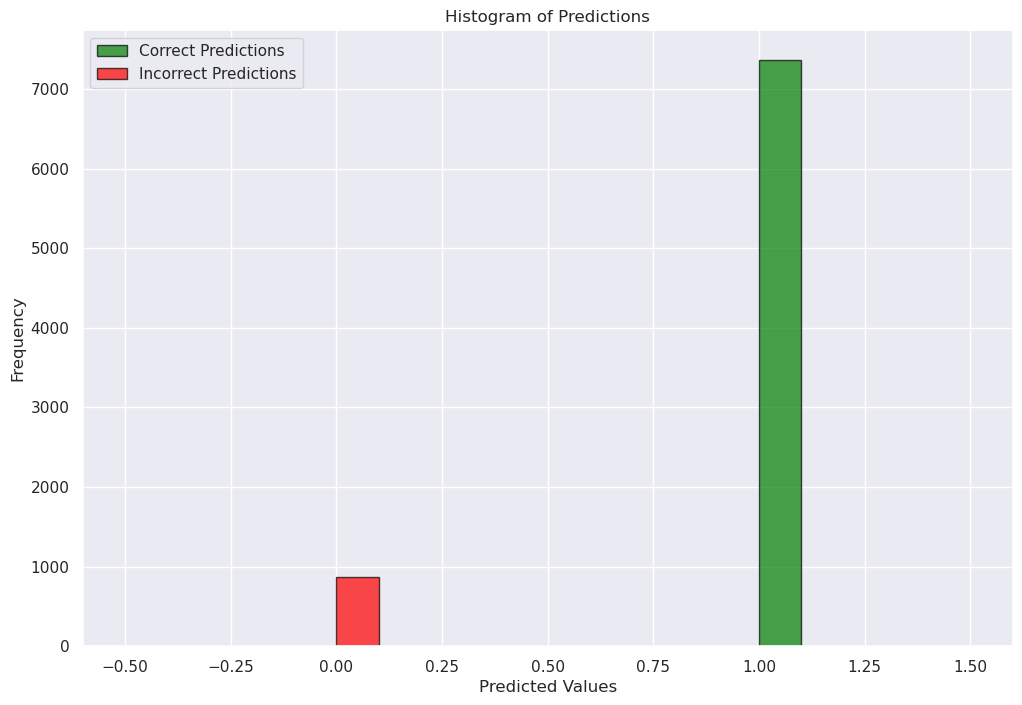

In [83]:
plt.figure(figsize=(12, 8))

plt.hist(true, alpha=0.7, color='green', label='Correct Predictions', edgecolor='black')

plt.hist(false, alpha=0.7, color='red', label='Incorrect Predictions', edgecolor='black')

plt.title('Histogram of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()